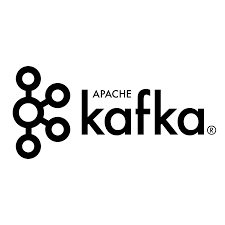


#**Arquitectura de [Kafka](https://kafka.apache.org/)**

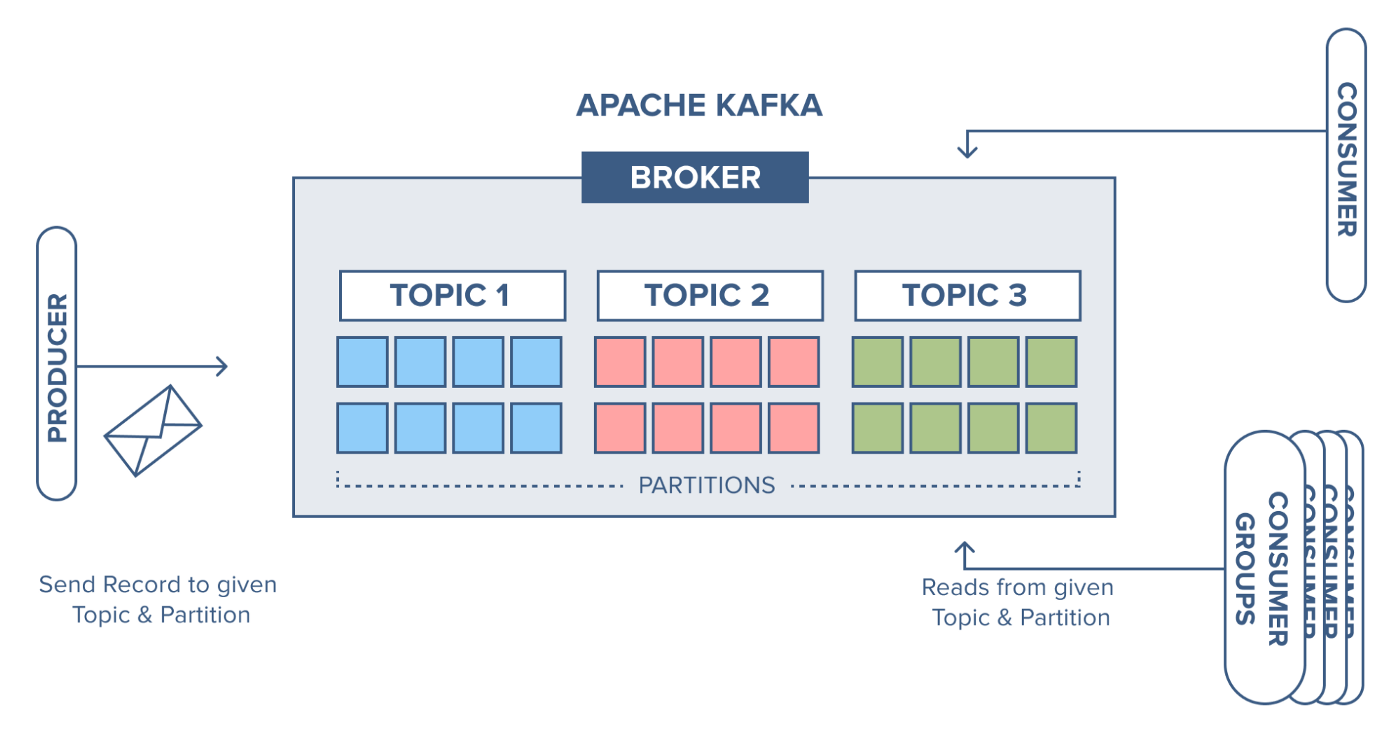

## **Casos de Uso** 


*   [Uber](https://eng.uber.com/ureplicator-apache-kafka-replicator/)
*   [Netflix](https://www.confluent.io/blog/how-kafka-is-used-by-netflix/)



Realizaremos una instalación local de Kafka y Zookeper. 
Sobre la relación entre Kafka y Zookeper [click aquí](https://medium.com/@rinu.gour123/role-of-apache-zookeeper-in-kafka-monitoring-configuration-c5bd1a7e4226)

In [ ]:
!!curl -sSOL https://dlcdn.apache.org/kafka/3.1.0/kafka_2.13-3.1.0.tgz
!tar -xzf kafka_2.13-3.1.0.tgz

In [ ]:
!./kafka_2.13-3.1.0/bin/zookeeper-server-start.sh -daemon ./kafka_2.13-3.1.0/config/zookeeper.properties
!./kafka_2.13-3.1.0/bin/kafka-server-start.sh -daemon ./kafka_2.13-3.1.0/config/server.properties
!echo "Waiting for 10 secs until kafka and zookeeper services are up and running"
!sleep 10

Waiting for 10 secs until kafka and zookeeper services are up and running


In [ ]:
!ps -ef | grep kafka

root         444       1 16 01:48 ?        00:00:02 java -Xmx512M -Xms512M -server -XX:+UseG1GC -XX:MaxGCPauseMillis=20 -XX:InitiatingHeapOccupancyPercent=35 -XX:+ExplicitGCInvokesConcurrent -XX:MaxInlineLevel=15 -Djava.awt.headless=true -Xlog:gc*:file=/content/kafka_2.13-3.1.0/bin/../logs/zookeeper-gc.log:time,tags:filecount=10,filesize=100M -Dcom.sun.management.jmxremote -Dcom.sun.management.jmxremote.authenticate=false -Dcom.sun.management.jmxremote.ssl=false -Dkafka.logs.dir=/content/kafka_2.13-3.1.0/bin/../logs -Dlog4j.configuration=file:./kafka_2.13-3.1.0/bin/../config/log4j.properties -cp /content/kafka_2.13-3.1.0/bin/../libs/activation-1.1.1.jar:/content/kafka_2.13-3.1.0/bin/../libs/aopalliance-repackaged-2.6.1.jar:/content/kafka_2.13-3.1.0/bin/../libs/argparse4j-0.7.0.jar:/content/kafka_2.13-3.1.0/bin/../libs/audience-annotations-0.5.0.jar:/content/kafka_2.13-3.1.0/bin/../libs/commons-cli-1.4.jar:/content/kafka_2.13-3.1.0/bin/../libs/commons-lang3-3.8.1.jar:/content/kafka_2.13

Creamos un tópico llamado **numbers**.

In [ ]:
!./kafka_2.13-3.1.0/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic numbers

Created topic numbers.


Instalamos la biblioteca [kafka-python](https://kafka-python.readthedocs.io/en/master/). 

In [ ]:
!pip install kafka-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 246 kB 14.6 MB/s 


In [ ]:
import time
import json
from kafka import KafkaProducer,KafkaConsumer
from kafka.errors import KafkaError
from random import *
import pandas as pd

Nos conectamos al servidor de kafka.

In [ ]:
producer = KafkaProducer(bootstrap_servers=['127.0.0.1:9092'])

In [ ]:
producer

Creamos mensajes del tipo (key,value) y los publicamos en el tópico **numbers**.

In [ ]:
i = 1;
while (i<=100):
  v = randint(1,100)
  msg = "%d" % v
  key = "%d" % i
  print("sending (%d,%d)"%(i,v))
  producer.send('numbers', key=key.encode('utf-8'), value=msg.encode('utf-8'))
  time.sleep(1)
  i=i+1

sending (1,27)
sending (2,18)
sending (3,14)
sending (4,90)
sending (5,51)
sending (6,85)
sending (7,66)
sending (8,73)
sending (9,59)
sending (10,60)
sending (11,78)
sending (12,64)
sending (13,79)
sending (14,55)
sending (15,19)
sending (16,43)
sending (17,28)
sending (18,38)
sending (19,4)
sending (20,2)
sending (21,24)
sending (22,35)
sending (23,45)
sending (24,36)
sending (25,95)
sending (26,88)
sending (27,47)
sending (28,12)
sending (29,40)
sending (30,92)
sending (31,2)
sending (32,92)
sending (33,33)
sending (34,61)
sending (35,40)
sending (36,22)
sending (37,43)
sending (38,61)
sending (39,51)
sending (40,70)
sending (41,59)
sending (42,42)
sending (43,76)
sending (44,90)
sending (45,75)
sending (46,11)
sending (47,51)
sending (48,95)
sending (49,22)
sending (50,37)
sending (51,89)
sending (52,24)
sending (53,76)
sending (54,3)
sending (55,94)
sending (56,45)
sending (57,100)
sending (58,50)
sending (59,15)
sending (60,19)
sending (61,36)
sending (62,15)
sending (63,25)
send

Ahora consumiremos mensajes desde el tópico **numbers**.

In [ ]:
consumer = KafkaConsumer('numbers',bootstrap_servers=['127.0.0.1:9092'],auto_offset_reset='earliest')
for msg in consumer:
  key = msg.key.decode(encoding="utf-8")
  value = msg.value.decode(encoding="utf-8")
  print("key = %s, value = %s" % (key,value))


key = 1, value = 27
key = 2, value = 2
key = 3, value = 56
key = 4, value = 54
key = 5, value = 66
key = 6, value = 65
key = 7, value = 57
key = 8, value = 66
key = 9, value = 17
key = 10, value = 7
key = 11, value = 48
key = 12, value = 98
key = 13, value = 62
key = 14, value = 19
key = 15, value = 99
key = 16, value = 22
key = 17, value = 15
key = 18, value = 14
key = 19, value = 78
key = 20, value = 47
key = 21, value = 78
key = 22, value = 27
key = 23, value = 49
key = 24, value = 21
key = 25, value = 66
key = 26, value = 72
key = 27, value = 83
key = 28, value = 27
key = 29, value = 31
key = 30, value = 71
key = 31, value = 46
key = 1, value = 27
key = 2, value = 18
key = 3, value = 14
key = 4, value = 90
key = 5, value = 51
key = 6, value = 85
key = 7, value = 66
key = 8, value = 73
key = 9, value = 59
key = 10, value = 60
key = 11, value = 78
key = 12, value = 64
key = 13, value = 79
key = 14, value = 55
key = 15, value = 19
key = 16, value = 43
key = 17, value = 28
key = 18, va

KeyboardInterrupt: ignored

## **Publicando mensajes con datos almacenados en un csv.**




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/08_BigData/files/'

In [ ]:
from csv import DictReader
from json import loads
import sys

producer_csv = KafkaProducer(bootstrap_servers=['127.0.0.1:9092'])

with open(path+'sales_info.csv','r') as read_obj:
    csv_dict_reader = DictReader(read_obj)
    for row in csv_dict_reader:
      print(json.dumps(row).encode('utf-8'))
      producer_csv.send('CSV', json.dumps(row).encode('utf-8'))
      time.sleep(1)

b'{"Company": "GOOG", "Person": "Sam", "Sales": "200"}'
b'{"Company": "GOOG", "Person": "Charlie", "Sales": "120"}'
b'{"Company": "GOOG", "Person": "Frank", "Sales": "340"}'
b'{"Company": "MSFT", "Person": "Tina", "Sales": "600"}'
b'{"Company": "MSFT", "Person": "Amy", "Sales": "124"}'
b'{"Company": "MSFT", "Person": "Vanessa", "Sales": "243"}'
b'{"Company": "FB", "Person": "Carl", "Sales": "870"}'
b'{"Company": "FB", "Person": "Sarah", "Sales": "350"}'
b'{"Company": "APPL", "Person": "John", "Sales": "250"}'
b'{"Company": "APPL", "Person": "Linda", "Sales": " 130"}'
b'{"Company": "APPL", "Person": "Mike", "Sales": " 750"}'
b'{"Company": "APPL", "Person": " Chris", "Sales": " 350"}'


## **Consumir mensajes desde el tópico CSV.**

In [ ]:
consumer_csv = KafkaConsumer ('CSV',bootstrap_servers=['127.0.0.1:9092'], auto_offset_reset = 'earliest',value_deserializer=lambda x: loads(x.decode('utf-8'))) 
try:
    for message in consumer_csv:
        print (message.value)
except KeyboardInterrupt:
    sys.exit()

{'Company': 'GOOG', 'Person': 'Sam', 'Sales': '200'}
{'Company': 'GOOG', 'Person': 'Charlie', 'Sales': '120'}
{'Company': 'GOOG', 'Person': 'Frank', 'Sales': '340'}
{'Company': 'MSFT', 'Person': 'Tina', 'Sales': '600'}
{'Company': 'MSFT', 'Person': 'Amy', 'Sales': '124'}
{'Company': 'MSFT', 'Person': 'Vanessa', 'Sales': '243'}
{'Company': 'FB', 'Person': 'Carl', 'Sales': '870'}
{'Company': 'FB', 'Person': 'Sarah', 'Sales': '350'}
{'Company': 'APPL', 'Person': 'John', 'Sales': '250'}
{'Company': 'APPL', 'Person': 'Linda', 'Sales': ' 130'}
{'Company': 'APPL', 'Person': 'Mike', 'Sales': ' 750'}
{'Company': 'APPL', 'Person': ' Chris', 'Sales': ' 350'}


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## Ahora vamos a producir y consumir mensajes en paralelo usando un servidor kafka instalado en AWS.
El código se encuentra en BD05-Kafka-Producer.ipynb y BD05-Kafka-Consumer.ipynb

# **Ejercicio 1**
Utilizaremos el archivo 'sales_info.csv' para publicar mensajes y consumir mensajes usando el servidor de AWS.
Los requerimientos son los siguientes:


*   Leer el contenido de 'sales_info.csv', convertir cada línea en formato json y publicarla como mensaje en el servidor.
*   El consumidor debe filtrar los mensajes donde "Total Cost" sea >= 304017.56 y generar con ellos un data frame. 

*   Filtrar los datos usando "Country" y simular el envío de mensajes a tantos tópicos como países existan en los mensajes (puede mostrar en pantalla un mensaje "enviando msg a topico_XXX", donde XXX es el nombre de un país).

*   Proponga 2 requerimientos adicionales.



In [ ]:
from csv import DictReader
from json import loads
from kafka import KafkaProducer,KafkaConsumer,KafkaAdminClient
from kafka.errors import KafkaError
import sys

In [ ]:
filename = 'SalesRecords.csv'

producer_csv = KafkaProducer(bootstrap_servers=['ec2-18-118-112-10.us-east-2.compute.amazonaws.com'])

with open(path+filename,'r') as read_obj:
    csv_dict_reader = DictReader(read_obj)
    for row in csv_dict_reader:
      print(json.dumps(row).encode('utf-8'))
      producer_csv.send('CSV', json.dumps(row).encode('utf-8'))
      time.sleep(1)


Se han truncado las últimas 5000 líneas del flujo de salida.
b'{"Region": "Sub-Saharan Africa", "Country": "Chad", "Item Type": "Household", "Sales Channel": "Online", "Order Priority": "C", "Order Date": "9/17/2014", "Order ID": "244255959", "Ship Date": "10/3/2014", "Units Sold": "9621", "Unit Price": "668.27", "Unit Cost": "502.54", "Total Revenue": "6429425.67", "Total Cost": "4834937.34", "Total Profit": "1594488.33"}'
b'{"Region": "Europe", "Country": "Greece", "Item Type": "Vegetables", "Sales Channel": "Online", "Order Priority": "C", "Order Date": "4/23/2016", "Order ID": "317047679", "Ship Date": "5/15/2016", "Units Sold": "309", "Unit Price": "154.06", "Unit Cost": "90.93", "Total Revenue": "47604.54", "Total Cost": "28097.37", "Total Profit": "19507.17"}'
b'{"Region": "Europe", "Country": "Latvia", "Item Type": "Household", "Sales Channel": "Online", "Order Priority": "L", "Order Date": "4/18/2016", "Order ID": "752347028", "Ship Date": "4/20/2016", "Units Sold": "5059", "U

In [ ]:
# 1. El consumidor debe filtrar los mensajes donde "Total Cost" sea >= 304017.56 y generar con ellos un data frame.

consumer = KafkaConsumer('CSV',bootstrap_servers=['ec2-18-118-112-10.us-east-2.compute.amazonaws.com'],auto_offset_reset='earliest')

filter_data = []
count_data = 0

for msg in consumer:
  data_msg = msg.value.decode(encoding="utf-8")
  jdata = json.loads(data_msg)

  country = jdata['Country']
  TotalCost = jdata['Total Cost']
  
  if float(TotalCost) >= 304017.56:
    print("Country = %s, Total Cost = %s" % (country,TotalCost))
    #save results
    filter_data.append(jdata)
    count_data += 1
    if count_data == 1000:
      #cortar proceso 
      break

df = pd.DataFrame(filter_data)
df.sample(5)

Country = Ghana, Total Cost = 470364.16
Country = Tanzania, Total Cost = 2045547.44
Country = Algeria, Total Cost = 2546137.77
Country = Singapore, Total Cost = 747949.44
Country = Papua New Guinea, Total Cost = 325857.28
Country = Vietnam, Total Cost = 452453.28
Country = Zimbabwe, Total Cost = 5051690.08
Country = France, Total Cost = 1516254.14
Country = The Bahamas, Total Cost = 517793.79
Country = Haiti, Total Cost = 1077217.92
Country = Nicaragua, Total Cost = 3915289.14
Country = Turkmenistan, Total Cost = 606503.10
Country = China, Total Cost = 3040043.36
Country = Uganda, Total Cost = 1588143.23
Country = Kuwait, Total Cost = 736723.64
Country = United Arab Emirates, Total Cost = 5041190.88
Country = Estonia, Total Cost = 5013339.04
Country = India, Total Cost = 521206.56
Country = Samoa , Total Cost = 2842868.78
Country = Czech Republic, Total Cost = 2411312.81
Country = Finland, Total Cost = 4094695.92
Country = Oman, Total Cost = 2090050.21
Country = Dominica, Total Cost = 

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
18,Australia and Oceania,Samoa,Household,Online,L,12/5/2016,937431466,12/8/2016,5657,668.27,502.54,3780403.39,2842868.78,937534.61
917,Sub-Saharan Africa,Angola,Beverages,Online,H,1/5/2016,836169278,2/16/2016,9926,47.45,31.79,470988.70,315547.54,155441.16
643,Central America and the Caribbean,Nicaragua,Vegetables,Offline,L,2/6/2014,223964297,3/12/2014,4867,154.06,90.93,749810.02,442556.31,307253.71
84,Sub-Saharan Africa,Mali,Household,Offline,M,8/19/2010,363086831,9/7/2010,4317,668.27,502.54,2884921.59,2169465.18,715456.41
498,Europe,Italy,Snacks,Offline,M,7/15/2017,721102511,7/29/2017,9112,152.58,97.44,1390308.96,887873.28,502435.68


In [ ]:
df.shape

(1000, 14)

In [ ]:
df.sample(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
776,Europe,Albania,Household,Online,C,3/8/2011,163522326,4/5/2011,8745,668.27,502.54,5844021.15,4394712.30,1449308.85
422,Europe,Vatican City,Vegetables,Offline,L,6/25/2015,965716540,6/29/2015,5839,154.06,90.93,899556.34,530940.27,368616.07
297,Europe,Latvia,Household,Offline,C,7/5/2010,345449912,7/12/2010,5160,668.27,502.54,3448273.20,2593106.40,855166.80
202,Central America and the Caribbean,Saint Vincent and the Grenadines,Baby Food,Offline,H,9/2/2016,478861701,10/19/2016,4674,255.28,159.42,1193178.72,745129.08,448049.64
758,Europe,Iceland,Cereal,Offline,L,1/2/2015,554722726,2/16/2015,3637,205.70,117.11,748130.90,425929.07,322201.83


In [ ]:
#Filtrar los datos usando "Country" y simular el envío de mensajes a tantos tópicos como países existan en los mensajes (puede mostrar en pantalla un mensaje "enviando msg a topico_XXX", donde XXX es el nombre de un país).

consumer = KafkaConsumer('CSV',bootstrap_servers=['ec2-18-118-112-10.us-east-2.compute.amazonaws.com'],auto_offset_reset='earliest')

filter_data = []
count_data = 0

for msg in consumer:
  data_msg = msg.value.decode(encoding="utf-8")
  jdata = json.loads(data_msg)

  country = jdata['Country']
  print("enviando msg a topico_%s" % (country))

  count_data += 1
  if count_data == 1000:
      #cortar proceso 
      break


enviando msg a topico_South Africa
enviando msg a topico_Morocco
enviando msg a topico_Papua New Guinea
enviando msg a topico_Djibouti
enviando msg a topico_Slovakia
enviando msg a topico_Sri Lanka
enviando msg a topico_Seychelles 
enviando msg a topico_Tanzania
enviando msg a topico_Ghana
enviando msg a topico_Tanzania
enviando msg a topico_Taiwan
enviando msg a topico_Algeria
enviando msg a topico_Singapore
enviando msg a topico_Papua New Guinea
enviando msg a topico_Vietnam
enviando msg a topico_Uganda
enviando msg a topico_Zimbabwe
enviando msg a topico_Ethiopia
enviando msg a topico_France
enviando msg a topico_The Bahamas
enviando msg a topico_Haiti
enviando msg a topico_Nicaragua
enviando msg a topico_Turkmenistan
enviando msg a topico_United Kingdom
enviando msg a topico_Dominican Republic
enviando msg a topico_China
enviando msg a topico_Uganda
enviando msg a topico_Kuwait
enviando msg a topico_United Arab Emirates
enviando msg a topico_Estonia
enviando msg a topico_Malaysia
e

In [ ]:
df['Item Type'].unique()

array(['Office Supplies', 'Cosmetics', 'Snacks', 'Clothes',
       'Personal Care', 'Household', 'Vegetables', 'Cereal', 'Meat',
       'Baby Food', 'Beverages'], dtype=object)

In [ ]:
df['Region'].unique()

array(['Sub-Saharan Africa', 'Middle East and North Africa', 'Asia',
       'Australia and Oceania', 'Europe',
       'Central America and the Caribbean', 'North America'], dtype=object)

In [ ]:
df['Country'].unique()

array(['Ghana', 'Tanzania', 'Algeria', 'Singapore', 'Papua New Guinea',
       'Vietnam', 'Zimbabwe', 'France', 'The Bahamas', 'Haiti',
       'Nicaragua', 'Turkmenistan', 'China', 'Uganda', 'Kuwait',
       'United Arab Emirates', 'Estonia', 'India', 'Samoa ',
       'Czech Republic', 'Finland', 'Oman', 'Dominica', 'Brunei',
       'Solomon Islands', 'Togo', 'Canada', 'Lebanon', 'South Korea',
       'Indonesia', 'Antigua and Barbuda ', 'Tunisia ', 'Thailand',
       'Nepal', 'Greece', 'Taiwan', 'Italy', 'Switzerland', 'Iceland',
       'Japan', 'Tonga', 'Mali', 'Albania', 'Romania', 'Pakistan',
       'Democratic Republic of the Congo', 'Malawi', 'Vanuatu',
       'Equatorial Guinea', 'El Salvador', 'Greenland', 'Kazakhstan',
       'Myanmar', 'Serbia', 'Somalia', 'Kenya', 'Zambia',
       'Marshall Islands', 'Armenia', 'Madagascar', 'Mongolia',
       'Seychelles ', 'Sierra Leone', 'Cape Verde', 'Denmark',
       'Saint Kitts and Nevis ', 'Syria', 'Saudi Arabia', 'Sudan',
       'Mo

In [ ]:
#3. Proponga 2 requerimientos adicionales.

#3.1. Identificar las transacciones de ropas (item Clothes) en la región de Europa

consumer = KafkaConsumer('CSV',bootstrap_servers=['ec2-18-118-112-10.us-east-2.compute.amazonaws.com'],auto_offset_reset='earliest')

filter_data = []
count_data = 0

for msg in consumer:
  data_msg = msg.value.decode(encoding="utf-8")
  jdata = json.loads(data_msg)

  country = jdata['Country']
  item    = jdata['Item Type']
  region    = jdata['Region']
  TotalCost = jdata['Total Cost']

  if (item == 'Clothes') and (region == 'Europe'):
    #save results
    filter_data.append(jdata)
    
    print("Country = %s, Item = %s, Region = %s, Total Cost = %s" % (country, item, region, TotalCost))

    count_data += 1
    if count_data == 100:
      #cortar proceso 
      break


Country = Serbia, Item = Clothes, Region = Europe, Total Cost = 263352.32
Country = Montenegro, Item = Clothes, Region = Europe, Total Cost = 75873.28
Country = Serbia, Item = Clothes, Region = Europe, Total Cost = 263352.32
Country = Montenegro, Item = Clothes, Region = Europe, Total Cost = 75873.28
Country = Armenia, Item = Clothes, Region = Europe, Total Cost = 33617.92
Country = Montenegro, Item = Clothes, Region = Europe, Total Cost = 320194.56
Country = Poland, Item = Clothes, Region = Europe, Total Cost = 255861.76
Country = Kosovo, Item = Clothes, Region = Europe, Total Cost = 34012.16
Country = Bosnia and Herzegovina, Item = Clothes, Region = Europe, Total Cost = 187443.20
Country = Macedonia, Item = Clothes, Region = Europe, Total Cost = 152212.48
Country = Russia, Item = Clothes, Region = Europe, Total Cost = 248622.08
Country = Iceland, Item = Clothes, Region = Europe, Total Cost = 188733.44
Country = Croatia, Item = Clothes, Region = Europe, Total Cost = 208983.04
Country 

In [ ]:
df2 = pd.DataFrame(filter_data)
df2.sample(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
38,Europe,Estonia,Clothes,Offline,M,8/15/2016,665456330,8/27/2016,2171,109.28,35.84,237246.88,77808.64,159438.24
1,Europe,Montenegro,Clothes,Offline,M,9/4/2016,902511680,9/8/2016,2117,109.28,35.84,231345.76,75873.28,155472.48
56,Europe,United Kingdom,Clothes,Offline,C,12/11/2015,544090878,1/23/2016,7437,109.28,35.84,812715.36,266542.08,546173.28
99,Europe,Armenia,Clothes,Offline,H,7/24/2015,835011422,8/12/2015,7290,109.28,35.84,796651.20,261273.60,535377.60
44,Europe,Poland,Clothes,Offline,M,3/6/2012,121681582,4/8/2012,7139,109.28,35.84,780149.92,255861.76,524288.16


In [ ]:
df2_perCountry = df2.groupby(by = 'Country')
df2_perCountry.mean()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Order ID,Units Sold
Country,,
Albania,6.128391e+08,1.567000e+03
Armenia,2.355958e+35,2.347346e+12
Austria,8.276132e+08,8.006000e+03
Belarus,3.288424e+17,1.200305e+07
Bosnia and Herzegovina,7.094194e+70,6.538138e+30
Croatia,2.252674e+52,9.719391e+22
Estonia,7.761201e+70,7.238944e+28
Georgia,1.606722e+17,8.965896e+06
Hungary,1.501671e+44,1.555945e+19


In [ ]:
#3.2. Identificar las transacciones provenientes de Japón

consumer = KafkaConsumer('CSV',bootstrap_servers=['ec2-18-118-112-10.us-east-2.compute.amazonaws.com'],auto_offset_reset='earliest')

filter_data = []
count_data = 0

for msg in consumer:
  data_msg = msg.value.decode(encoding="utf-8")
  jdata = json.loads(data_msg)

  country = jdata['Country']
  item    = jdata['Item Type']
  region    = jdata['Region']
  TotalCost = jdata['Total Cost']

  if (country == 'Japan'):
    #save results
    filter_data.append(jdata)
    print("#%d, Country = %s, Item = %s, Region = %s, Total Cost = %s" % (count_data+1, country, item, region, TotalCost))

    count_data += 1
    if count_data == 99:
      #cortar proceso 
      break

#1, Country = Japan, Item = Household, Region = Asia, Total Cost = 4217818.22
#2, Country = Japan, Item = Household, Region = Asia, Total Cost = 4217818.22
#3, Country = Japan, Item = Cereal, Region = Asia, Total Cost = 1108680.37
#4, Country = Japan, Item = Office Supplies, Region = Asia, Total Cost = 2909328.32
#5, Country = Japan, Item = Vegetables, Region = Asia, Total Cost = 420278.46
#6, Country = Japan, Item = Beverages, Region = Asia, Total Cost = 63961.48
#7, Country = Japan, Item = Cosmetics, Region = Asia, Total Cost = 1291370.32
#8, Country = Japan, Item = Vegetables, Region = Asia, Total Cost = 365447.67
#9, Country = Japan, Item = Personal Care, Region = Asia, Total Cost = 274282.80
#10, Country = Japan, Item = Cosmetics, Region = Asia, Total Cost = 1218164.58
#11, Country = Japan, Item = Household, Region = Asia, Total Cost = 4217818.22
#12, Country = Japan, Item = Cereal, Region = Asia, Total Cost = 1108680.37
#13, Country = Japan, Item = Office Supplies, Region = Asia,

In [ ]:
df3 = pd.DataFrame(filter_data)
df3.sample(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
58,Asia,Japan,Office Supplies,Online,M,6/14/2015,246801698,7/5/2015,2962,651.21,524.96,1928884.02,1554931.52,373952.50
98,Asia,Japan,Baby Food,Offline,C,9/17/2013,833212411,10/16/2013,4923,255.28,159.42,1256743.44,784824.66,471918.78
25,Asia,Japan,Meat,Offline,M,8/24/2011,972504031,9/24/2011,4409,421.89,364.69,1860113.01,1607918.21,252194.80
18,Asia,Japan,Cosmetics,Offline,C,3/9/2014,352510774,3/20/2014,4626,437.20,263.33,2022487.20,1218164.58,804322.62
36,Asia,Japan,Cosmetics,Online,L,3/3/2016,672485005,4/9/2016,2112,437.20,263.33,923366.40,556152.96,367213.44


In [ ]:
df3_perItem = df2.groupby(by = 'Item Type')
df3_perItem.mean()